<a href="https://colab.research.google.com/github/eanasir/SSN-MEiL/blob/main/ssn_meil_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

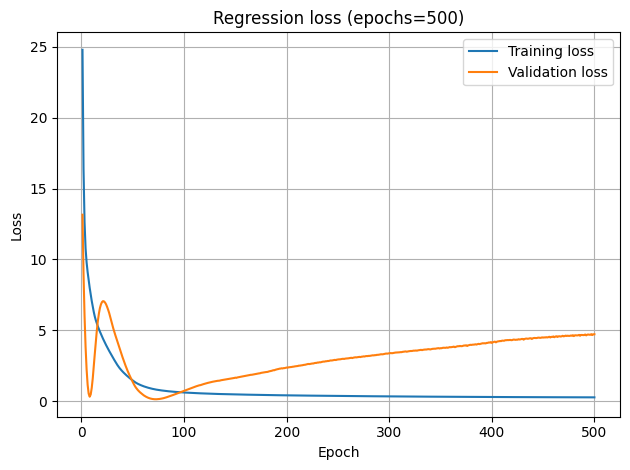

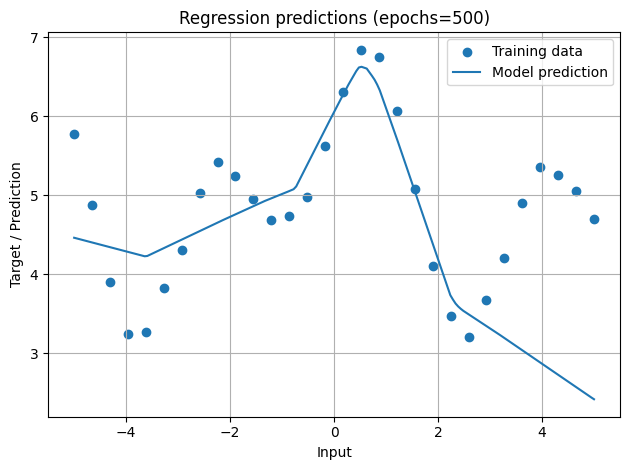

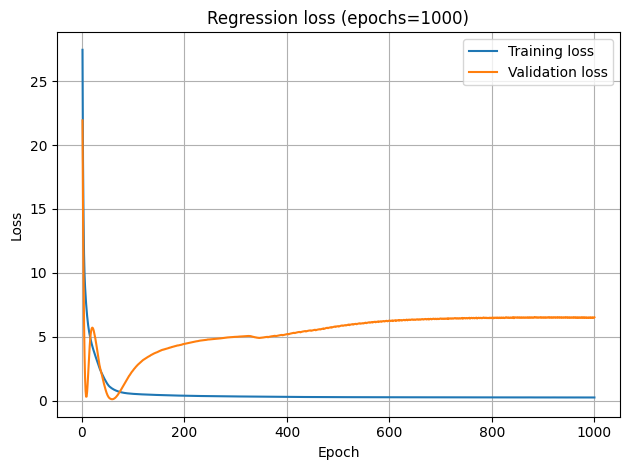

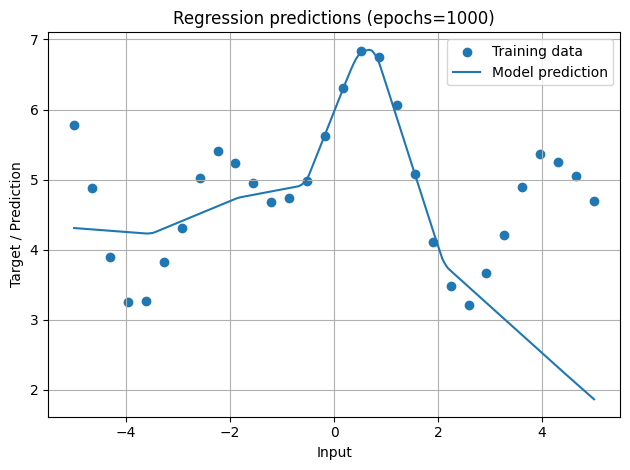

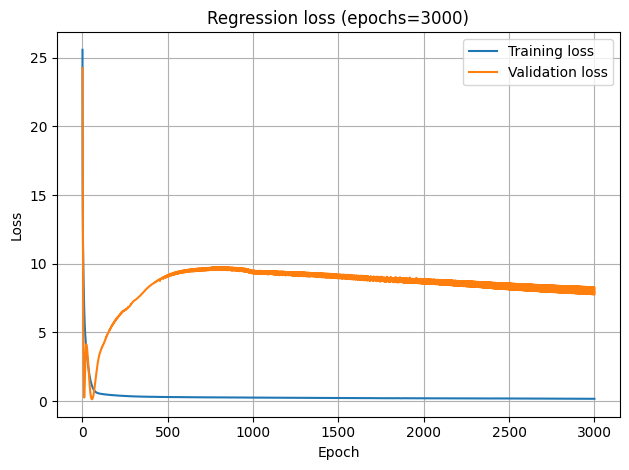

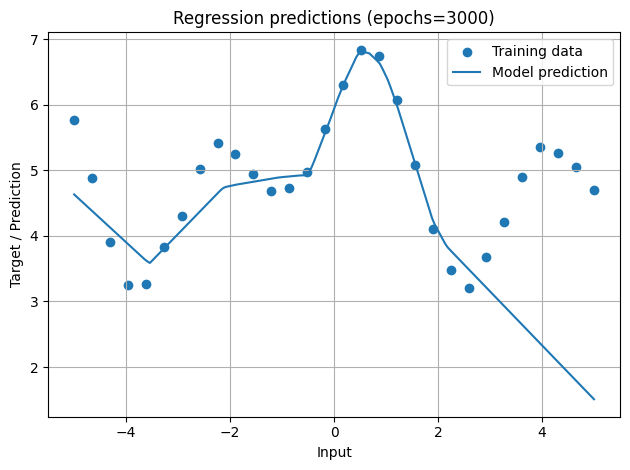

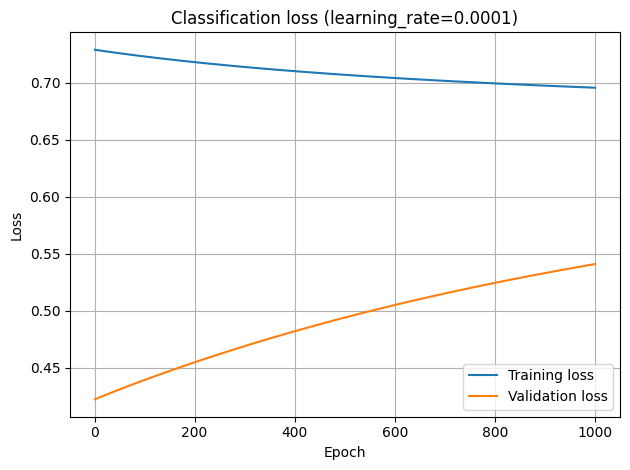

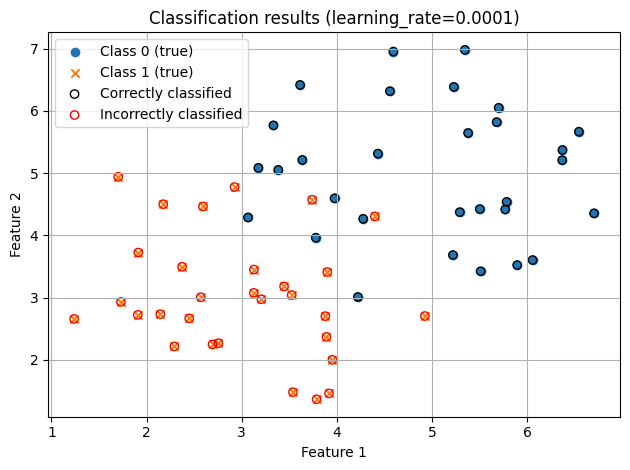

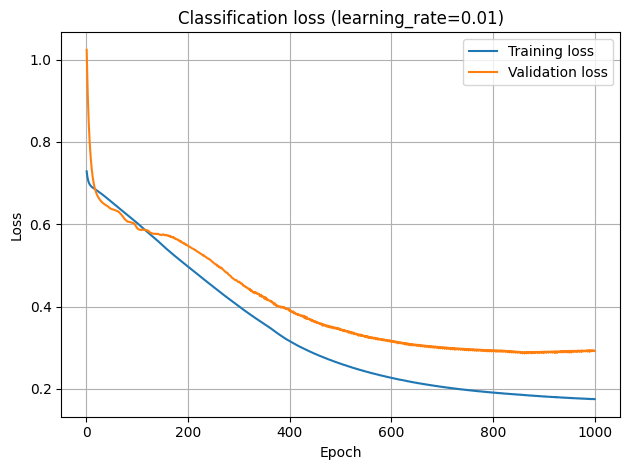

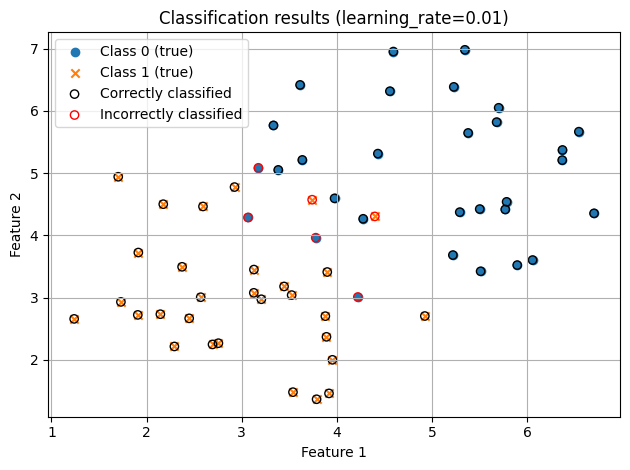

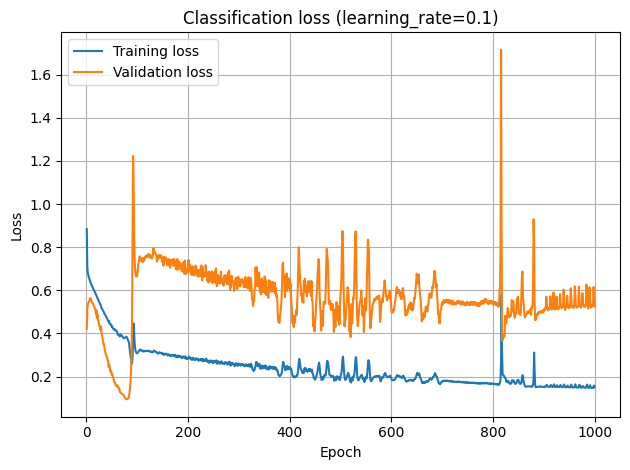

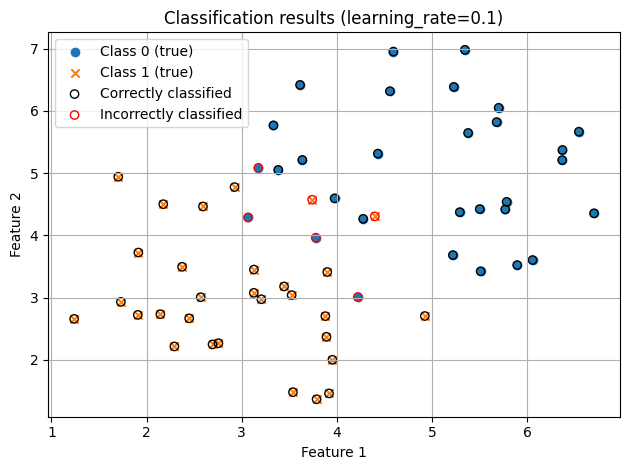

In [ ]:

#from Quran import Haram
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def set_global_seed(seed_value=123):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def generate_regression_data(sample_count=30):
    input_values = np.linspace(-5, 5, sample_count).reshape(-1, 1)
    clean_values = np.sin(2 * input_values) + np.cos(input_values) + 5
    noise_values = np.random.normal(0, 0.05, sample_count).reshape(-1, 1)
    target_values = clean_values + noise_values
    return input_values, target_values

def generate_classification_data(sample_count=30):
    class1_feature1 = 1 + 4 * np.random.rand(sample_count, 1)
    class1_feature2 = 1 + 4 * np.random.rand(sample_count, 1)
    class1_inputs = np.concatenate((class1_feature1, class1_feature2), axis=1)
    class1_labels = np.ones(sample_count)
    class0_feature1 = 3 + 4 * np.random.rand(sample_count, 1)
    class0_feature2 = 3 + 4 * np.random.rand(sample_count, 1)
    class0_inputs = np.concatenate((class0_feature1, class0_feature2), axis=1)
    class0_labels = np.zeros(sample_count)
    all_inputs = np.concatenate((class1_inputs, class0_inputs))
    all_labels = np.concatenate((class1_labels, class0_labels))
    return all_inputs, all_labels

def build_regression_model(input_dimension, output_dimension):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dimension,)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(output_dimension, activation="linear")
    ])
    optimizer = tf.keras.optimizers.SGD()
    model.compile(optimizer=optimizer, loss="mse")
    return model

def build_classification_model(input_dimension, learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dimension,)),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

def plot_training_and_validation_loss(training_history, title_text):
    training_loss = training_history.history["loss"]
    validation_loss = training_history.history["val_loss"]
    epoch_range = range(1, len(training_loss) + 1)
    plt.figure()
    plt.plot(epoch_range, training_loss, label="Training loss")
    plt.plot(epoch_range, validation_loss, label="Validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title_text)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_regression_predictions(trained_model, input_values, target_values, title_text):
    evaluation_inputs = np.linspace(input_values.min(), input_values.max(), 200).reshape(-1, 1)
    evaluation_predictions = trained_model.predict(evaluation_inputs, verbose=0)
    plt.figure()
    plt.scatter(input_values, target_values, label="Training data")
    plt.plot(evaluation_inputs, evaluation_predictions, label="Model prediction")
    plt.xlabel("Input")
    plt.ylabel("Target / Prediction")
    plt.title(title_text)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_classification_results(trained_model, input_values, target_labels, title_text):
    predicted_probabilities = trained_model.predict(input_values, verbose=0).flatten()
    predicted_labels = (predicted_probabilities >= 0.5).astype(int)
    class0_indices = np.where(target_labels == 0)[0]
    class1_indices = np.where(target_labels == 1)[0]
    plt.figure()
    plt.scatter(input_values[class0_indices, 0], input_values[class0_indices, 1], label="Class 0 (true)", marker="o")
    plt.scatter(input_values[class1_indices, 0], input_values[class1_indices, 1], label="Class 1 (true)", marker="x")
    correctly_classified_indices = np.where(predicted_labels == target_labels)[0]
    incorrectly_classified_indices = np.where(predicted_labels != target_labels)[0]
    if correctly_classified_indices.size > 0:
        plt.scatter(input_values[correctly_classified_indices, 0], input_values[correctly_classified_indices, 1], label="Correctly classified", facecolors="none", edgecolors="black")
    if incorrectly_classified_indices.size > 0:
        plt.scatter(input_values[incorrectly_classified_indices, 0], input_values[incorrectly_classified_indices, 1], label="Incorrectly classified", facecolors="none", edgecolors="red")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title_text)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def run_regression_experiments():
    set_global_seed()
    input_values, target_values = generate_regression_data()
    epoch_options = [500, 1000, 3000]
    for epoch_count in epoch_options:
        regression_model = build_regression_model(input_dimension=input_values.shape[1], output_dimension=target_values.shape[1])
        training_history = regression_model.fit(
            input_values,
            target_values,
            validation_split=0.2,
            epochs=epoch_count,
            batch_size=32,
            verbose=0
        )
        plot_training_and_validation_loss(training_history, f"Regression loss (epochs={epoch_count})")
        plot_regression_predictions(regression_model, input_values, target_values, f"Regression predictions (epochs={epoch_count})")

def run_classification_experiments():
    set_global_seed()
    input_values, target_labels = generate_classification_data()
    learning_rate_options = [0.0001, 0.01, 0.1]
    for learning_rate in learning_rate_options:
        classification_model = build_classification_model(input_dimension=input_values.shape[1], learning_rate=learning_rate)
        training_history = classification_model.fit(
            input_values,
            target_labels,
            validation_split=0.2,
            epochs=1000,
            batch_size=32,
            verbose=0
        )
        plot_training_and_validation_loss(training_history, f"Classification loss (learning_rate={learning_rate})")
        plot_classification_results(classification_model, input_values, target_labels, f"Classification results (learning_rate={learning_rate})")

if __name__ == "__main__":
    run_regression_experiments()
    run_classification_experiments()
